1. 通过分析某城市内各个基站的：工作日上班时间人均停留时间、凌晨人均停留时间、周末人均停留时间、日均人流量，来对基站进行聚类分析。（数据文件为：../data/business_circle.xls）

In [1]:
import pandas as pd
import numpy as np

In [2]:
filename = '../data_analysis_tutorial/data/business_circle.xls'
data = pd.read_excel(filename, index_col='基站编号')

data.head()

,工作日上班时间人均停留时间,凌晨人均停留时间,周末人均停留时间,日均人流量
基站编号,,,,
36902,78,521,602,2863
36903,144,600,521,2245
36904,95,457,468,1283
36905,69,596,695,1054
36906,190,527,691,2051


In [3]:
len(data)

431

In [4]:
k = 3
iteration = 500

normalized_data = 1.0 * (data - data.mean()) / data.std()

from sklearn.cluster import KMeans
model = KMeans(n_clusters = k, n_jobs = 1, max_iter = iteration, random_state = 0)
model.fit(normalized_data)

r1 = pd.Series(model.labels_).value_counts()
r2 = pd.DataFrame(model.cluster_centers_)

r = pd.concat([r2, r1], axis = 1)
r.columns = list(data.columns) + ['类别数量']
print('计算得到的各类中心点和类别')
print(r)

计算得到的各类中心点和类别
   工作日上班时间人均停留时间  凌晨人均停留时间  周末人均停留时间     日均人流量  类别数量
0       1.418780 -0.704932 -0.801638 -0.168344   137
1      -0.578455  1.356530  1.282240 -1.011058   148
2      -0.744941 -0.713635 -0.547584  1.182874   146


In [5]:
r = pd.concat([data, pd.Series(model.labels_, index = data.index)], axis = 1)
r.columns = list(data.columns) + ['聚类类别']
r.head()

,工作日上班时间人均停留时间,凌晨人均停留时间,周末人均停留时间,日均人流量,聚类类别
基站编号,,,,,
36902,78,521,602,2863,1
36903,144,600,521,2245,1
36904,95,457,468,1283,1
36905,69,596,695,1054,1
36906,190,527,691,2051,1


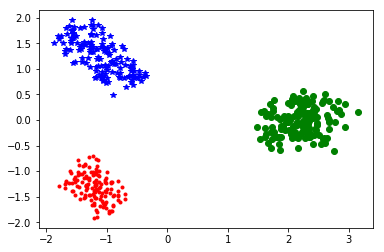

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)
transformed_data = pd.DataFrame(reduced_data, index = normalized_data.index)

d = transformed_data[r['聚类类别'] == 0]
plt.plot(d[0], d[1], 'r.')
d = transformed_data[r['聚类类别'] == 1]
plt.plot(d[0], d[1], 'go')
d = transformed_data[r['聚类类别'] == 2]
plt.plot(d[0], d[1], 'b*')
plt.show()